#                                                          ALEX THE ANALYST ANALYSIS

### In the following project we will be doing n an analysis on a youtube channel called ALEX THE ANALYST

In [1]:
## We will be importing the various libraries tah we will be using for our project  for data manipulation and data visulization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# The data ins in a folder in out project and we will be reading it using the below method
df =pd.read_csv('/content/sample_data/video_data.csv')

In [3]:
# In the following video we will be looking at forst 5 values in our data
df.head()

,Title,Published_date,Views,Likes,Dislikes,Comments,Duration (Minutes)
0,AWS Glue DataBrew and Glue | AWS Essentials,2024-09-24T12:00:16Z,1197,38,0,5,45.53
1,Amazon Athena in AWS | AWS Fundamentals,2024-09-17T12:00:24Z,2535,69,0,6,24.55
2,Alex Freberg and Ben Rogojan Livestream | Ever...,2024-09-11T03:20:13Z,5201,182,0,7,75.27
3,Landing a Data Job Course on Analyst Builder,2024-09-03T12:00:05Z,21272,779,0,89,8.33
4,S3 Storage in AWS | AWS Essentials,2024-08-27T12:00:47Z,3128,97,0,9,14.63


**In the following data we have 5 columnsin our data namely  Title,Published_date,Views,Likes,Dislikes,comments,Duration**

In [4]:
# Looking at whether in our data we have missing rows if we have we will have to either drop the rows or find alternative ways to deal with the data
df.isnull().sum()

,0
Title,0
Published_date,0
Views,0
Likes,0
Dislikes,0
Comments,0
Duration (Minutes),0


After assessing we  find out that our data is complete and has no nulls

In [39]:
df.shape

(324, 7)

In [40]:
# further statistics on columns with numeric values
df.describe()

,Views,Likes,Dislikes,Comments,Duration (Minutes)
count,3.240000e+02,324.000000,324.0,324.000000,324.000000
mean,1.232408e+05,3079.774691,0.0,178.925926,23.059537
std,2.277677e+05,5255.621091,0.0,382.250174,28.395388
min,1.197000e+03,38.000000,0.0,5.000000,0.150000
25%,1.307725e+04,476.500000,0.0,31.000000,6.665000
50%,4.073950e+04,1302.500000,0.0,75.000000,12.460000
75%,1.285218e+05,3221.500000,0.0,171.750000,26.120000
max,1.966041e+06,39659.000000,0.0,4164.000000,274.400000


In [41]:
# we will be looking whether our data has duplicates
df['Title'].nunique()



324

we find that we have no duplictaes in our dataset

In [42]:
#we will be looking at our data types and we will need to have one column with categorical values ,one wth data time and the rest with numerical values
df.dtypes

,0
Title,object
Published_date,object
Views,int64
Likes,int64
Dislikes,int64
Comments,int64
Duration (Minutes),float64


In [43]:
df['Published_date'] = pd.to_datetime(df['Published_date'])


print(df.dtypes)

Title                              object
Published_date        datetime64[ns, UTC]
Views                               int64
Likes                               int64
Dislikes                            int64
Comments                            int64
Duration (Minutes)                float64
dtype: object


In [45]:
# In the following we will be looking at the dislikes in our data and when we find out there are dsilikes
#we will want to know whcih videos are most disliked and we will look at the attributes of all of them
total_dislikes = df['Dislikes'].sum()
print(f'Total Number of Dislikes: {total_dislikes}')


Total Number of Dislikes: 0


In [46]:
# We see that we have no dislikes in our videos  not even one and thus we dont need the column dislikes since no analysis can be done on that column
df.drop(columns=['Dislikes'], inplace=True)


In [13]:
# we will also be looking at other statistics such as the mean of views,likes and comments
avg_views = df['Views'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

print(f'Average Views: {avg_views}')
print(f'Average Likes: {avg_likes}')
print(f'Average Comments: {avg_comments}')





Average Views: 123240.78395061729
Average Likes: 3079.7746913580245
Average Comments: 178.92592592592592


In [21]:
import pandas as pd

# Calculate the correlation
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix of Video Metrics:")
print(correlation_matrix)



Correlation Matrix of Video Metrics:
                       Views     Likes  Comments  Duration (Minutes)
Views               1.000000  0.936042  0.743684           -0.065975
Likes               0.936042  1.000000  0.697519           -0.101902
Comments            0.743684  0.697519  1.000000            0.033321
Duration (Minutes) -0.065975 -0.101902  0.033321            1.000000


We will want to look at the correlation of views ,likes ,comments and duration of our data

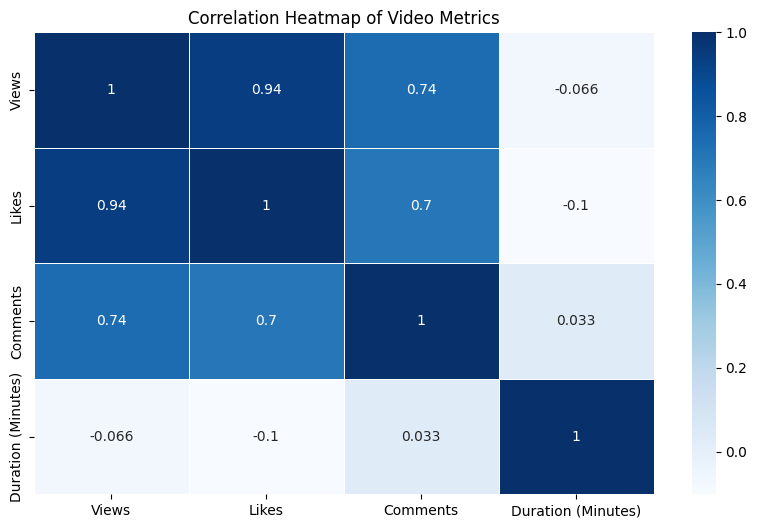

In [20]:
numeric_df = df.select_dtypes(include=['number'])

# Draw a heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Video Metrics')
plt.show()

**summary**

The correlation matrix provides insights into the relationships between the different video metrics:

1. **Views and Likes**: There is a very strong positive correlation (0.94) between views and likes, suggesting that videos with more views tend to receive significantly more likes.

2. **Views and Comments**: Views also show a strong positive correlation (0.74) with comments, indicating that videos with higher view counts tend to have more user engagement in the form of comments.

3. **Likes and Comments**: There is a moderate positive correlation (0.70) between likes and comments, which implies that videos with many likes are also likely to receive more comments, though the relationship isn't as strong as that between views and likes.

4. **Duration and Other Metrics**:
   - **Duration vs. Views (-0.07)** and **Duration vs. Likes (-0.10)**: There is a weak negative correlation between duration and both views and likes, indicating that longer videos may slightly decrease audience views and likes, though the effect is minimal.
   - **Duration vs. Comments (0.03)**: The weak positive correlation between video duration and comments suggests there is almost no relationship, indicating that longer videos neither significantly increase nor decrease the likelihood of receiving comments.

**Summary**:
video popularity (views) is highly linked with likes and somewhat with comments, while video duration has minimal impact on these engagement metrics.


<Axes: title={'center': 'Distribution of Video Durations'}, ylabel='Frequency'>

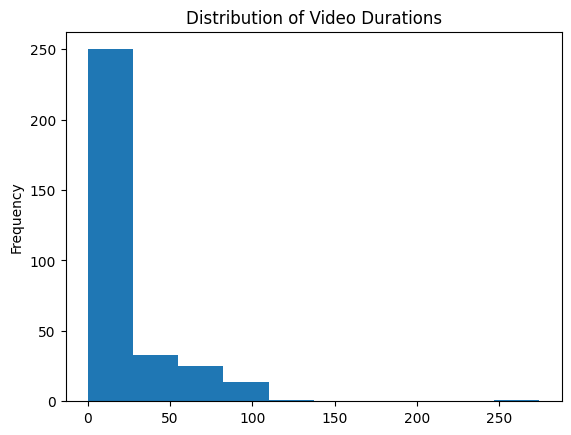

In [ ]:
df['Duration (Minutes)'].plot(kind='hist', title='Distribution of Video Durations')


From the above histogram we can see that most videos are  have less durations

In [ ]:
# we will be looking at 5 top most videos sorting them according to views
top_videos = df.sort_values(by='Views', ascending=False).head()
top_videos

,Title,Published_date,Views,Likes,Comments,Duration (Minutes)
229,Data Analyst Portfolio Project | SQL Data Expl...,2021-05-04 11:00:31+00:00,1966041,34302,4164,77.15
132,FREE Data Analyst Bootcamp!!,2023-02-07 12:30:11+00:00,1457584,39221,1528,6.87
312,SQL Basics Tutorial For Beginners | Installing...,2020-03-01 00:50:38+00:00,1420319,18292,2050,9.62
133,How to Become a Data Analyst in 2023 (Complete...,2023-01-31 12:30:06+00:00,1163857,39659,1131,13.98
289,What Does a Data Analyst Actually Do?,2020-07-29 13:48:00+00:00,963049,18795,491,4.30


1.We can see that all the above videos are not from this year means that a video has to have more time to accumulate more views.

2.We can see that there is a postive correlation with lview and comments ,of the five the most viewed video has the  msot comments.

3.Look also at the duration ,4 of 5 videos in the top 5 have less than 20 minutes

<Axes: title={'center': 'Views Trend Over Time'}, xlabel='Published_date'>

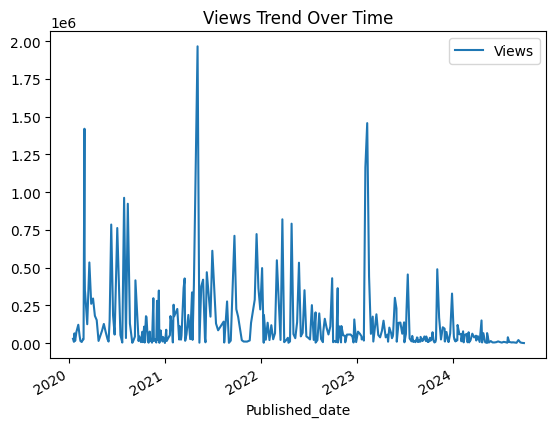

In [ ]:
# in the following video we will be looking at the trend of views over time
df['Published_date'] = pd.to_datetime(df['Published_date'])
df.plot(x='Published_date', y='Views', kind='line', title='Views Trend Over Time')


The trend is a downward trend of views overtime .2024 has seen lesser views.

1.2021 has the most views ,we would want to fnd out why this is the case is it becuse of the type of content that was shared or did we  have more videos that were shared in 2021.

In [29]:

# Group by 'Year' and calculate the total number of views
views_per_year = df.groupby('Year')['Views'].sum()

# Print the total number of views per year
print("Total number of views per year:")
print(views_per_year)


Total number of views per year:
Year
2020    11435033
2021    10931148
2022     7490976
2023     8646381
2024     1426476
Name: Views, dtype: int64


In [24]:


# Filter the data for videos published in 2021
df_2021 = df[df['Published_date'].dt.year == 2021]

# Sort the videos by the 'Views' column in descending order and select the top 10
top_10_videos_2021 = df_2021.sort_values(by='Views', ascending=False).head(10)

# Print the top 10 videos
print("Top 10 Videos with Most Views in 2021:")
print(top_10_videos_2021[['Title','Published_date', 'Views', 'Likes', 'Comments', 'Duration (Minutes)']])


Top 10 Videos with Most Views in 2021:
                                                 Title  \
229  Data Analyst Portfolio Project | SQL Data Expl...   
203  Pivot Tables in Excel | Excel Tutorials for Be...   
212  How to Install Tableau and Create First Visual...   
221         How to Create a Portfolio Website for FREE   
223  How To Get a Data Analyst Job (with No Experie...   
237  Advanced SQL Tutorial | Stored Procedures + Us...   
226  Data Analyst Portfolio Project | Data Cleaning...   
230                 Advanced SQL Tutorial | Subqueries   
227  Data Analyst Portfolio Project | Tableau Visua...   
238  Google Data Analytics Professional Certificate...   

               Published_date    Views  Likes  Comments  Duration (Minutes)  
229 2021-05-04 11:00:31+00:00  1966041  34302      4164               77.15  
203 2021-12-14 11:30:07+00:00   722806  14819       390               17.58  
212 2021-09-21 11:30:01+00:00   711439  16381       395               17.07  
221 2021-0

In [25]:


# Group by 'Year' and count the number of videos
videos_per_year = df.groupby('Year').size()

# Print the total number of videos per year
print("Total number of videos per year:")
print(videos_per_year)


Total number of videos per year:
Year
2020    71
2021    52
2022    61
2023    87
2024    53
dtype: int64


In [28]:


# Group by 'Year' and calculate the median duration of videos
median_duration_per_year = df.groupby('Year')['Duration (Minutes)'].mean()

# Print the median duration of videos by year
print("Median duration of videos (in minutes) by year:")
print(median_duration_per_year)


Median duration of videos (in minutes) by year:
Year
2020    16.055634
2021    20.948077
2022    26.425410
2023    25.699540
2024    26.306226
Name: Duration (Minutes), dtype: float64


In [30]:


# Group by 'Year' to calculate the total number of videos and total views
summary_per_year = df.groupby('Year').agg(
    total_videos=('Views', 'size'),
    total_views=('Views', 'sum')
)

# Calculate the average views per video
summary_per_year['average_views_per_video'] = summary_per_year['total_views'] / summary_per_year['total_videos']

# Print the summary with total videos and average views per video
print("Total videos and average views per video by year:")
print(summary_per_year[['total_videos', 'average_views_per_video']])



Total videos and average views per video by year:
      total_videos  average_views_per_video
Year                                       
2020            71            161056.802817
2021            52            210214.384615
2022            61            122802.885246
2023            87             99383.689655
2024            53             26914.641509


The main question wis why is the trend slowing down despite:

1.The number of videos published in 2021 is the least yet it has the most views to total_video  ratio

We can also see that as the mean of minutes increase then the viewership reduces,we can seethe views per video have continued to decrease as the average duration of videos increase

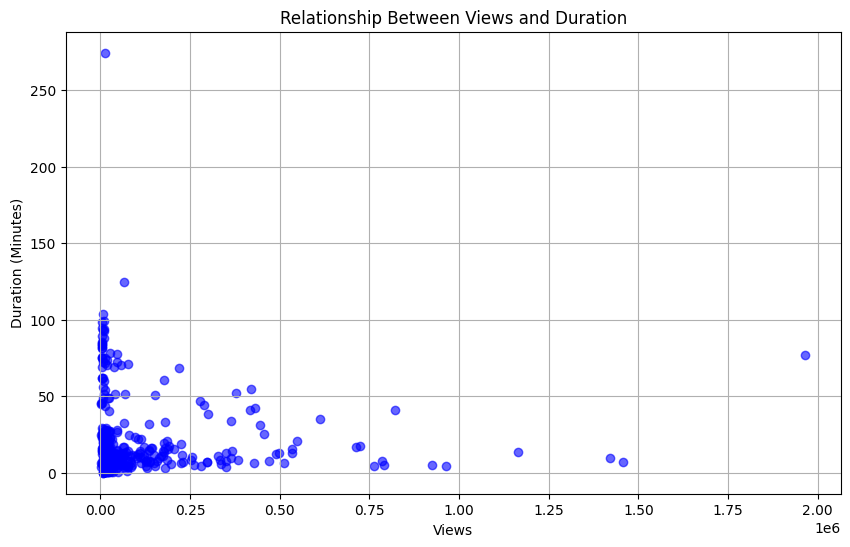

In [ ]:

# Plotting the relationship between Views and Duration
plt.figure(figsize=(10, 6))
plt.scatter(df['Views'], df['Duration (Minutes)'], color='blue', alpha=0.6)
plt.title('Relationship Between Views and Duration')
plt.xlabel('Views')
plt.ylabel('Duration (Minutes)')
plt.grid()
plt.show()


We can see that there is an inverse relationship between the duration of videos and the number of views as expected that longer videos tend to have less  viewership

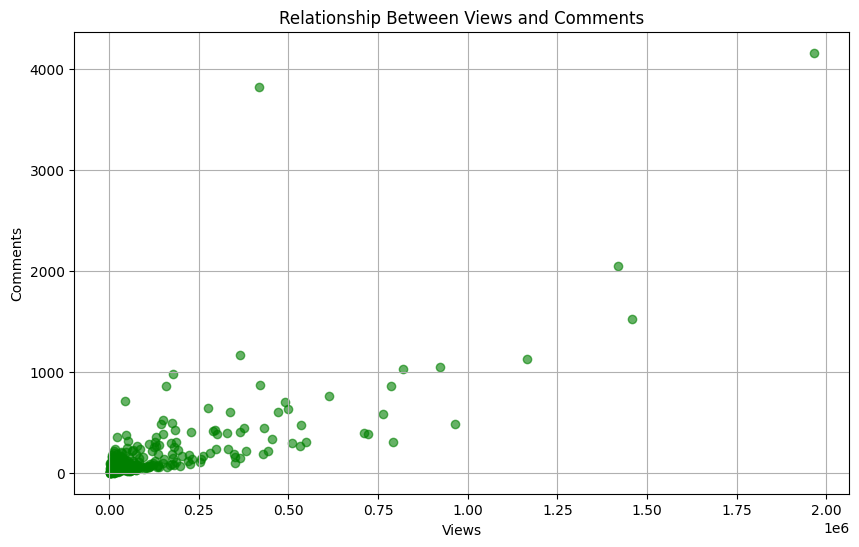

In [ ]:

# Plotting the relationship between Views and Comments
plt.figure(figsize=(10, 6))
plt.scatter(df['Views'], df['Comments'], color='green', alpha=0.6)
plt.title('Relationship Between Views and Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.grid()
plt.show()


We can see that videos with less views also tend to have less comments  and as the views increase then the number of comments increase

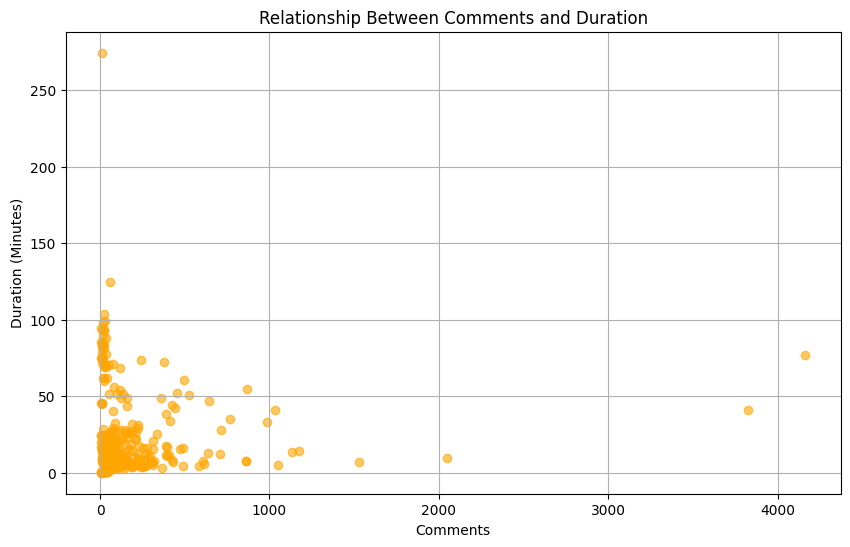

In [ ]:


# Plotting the relationship between Comments and Duration
plt.figure(figsize=(10, 6))
plt.scatter(df['Comments'], df['Duration (Minutes)'], color='orange', alpha=0.6)
plt.title('Relationship Between Comments and Duration')
plt.xlabel('Comments')
plt.ylabel('Duration (Minutes)')
plt.grid()
plt.show()


We can see that when the video has less minutes it has lesser comments ,as with  the views and videos below 50 minutes tend to attract more comments

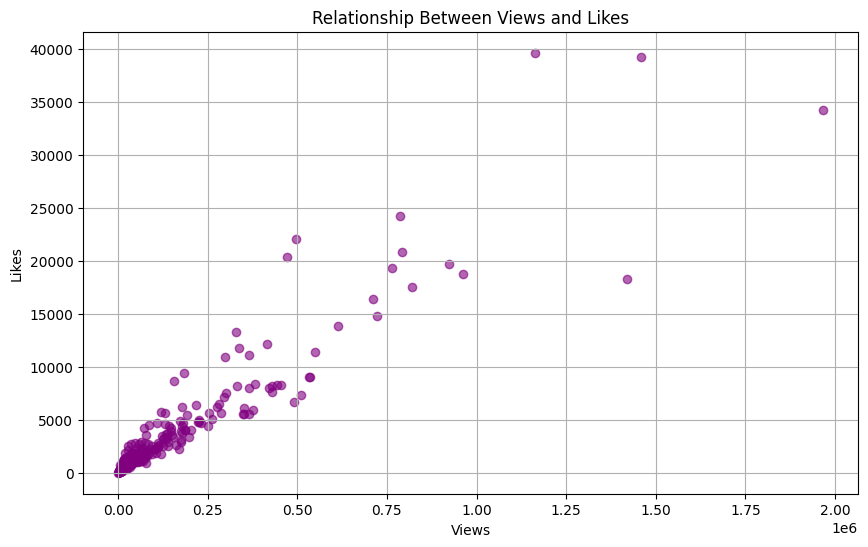

In [ ]:

# Plotting the relationship between Views and Likes
plt.figure(figsize=(10, 6))
plt.scatter(df['Views'], df['Likes'], color='purple', alpha=0.6)
plt.title('Relationship Between Views and Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid()
plt.show()


In the following we see  as the number of views increase so does the number of likes and they are both directly related

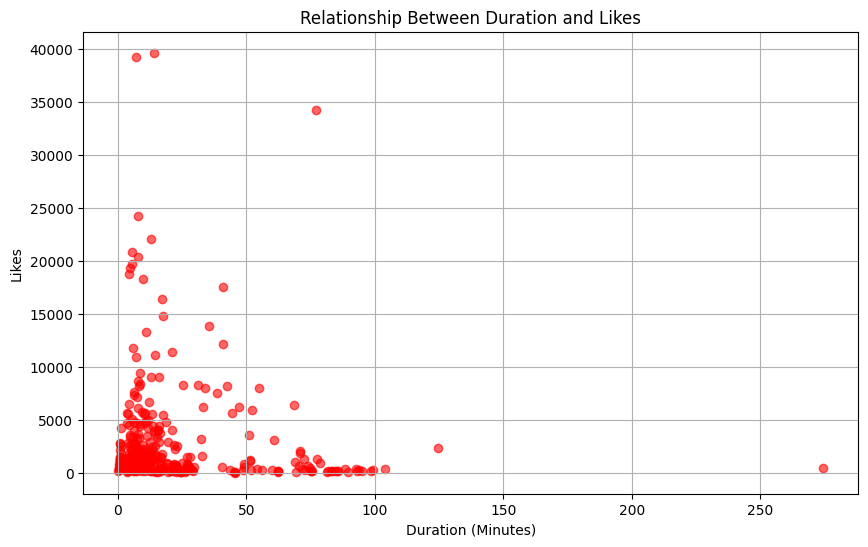

In [ ]:

# Plotting the relationship between Duration and Likes
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (Minutes)'], df['Likes'], color='red', alpha=0.6)
plt.title('Relationship Between Duration and Likes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Likes')
plt.grid()
plt.show()


From the above plot we can see that as the less the duration of minutes of our videos the more the likes a video has.

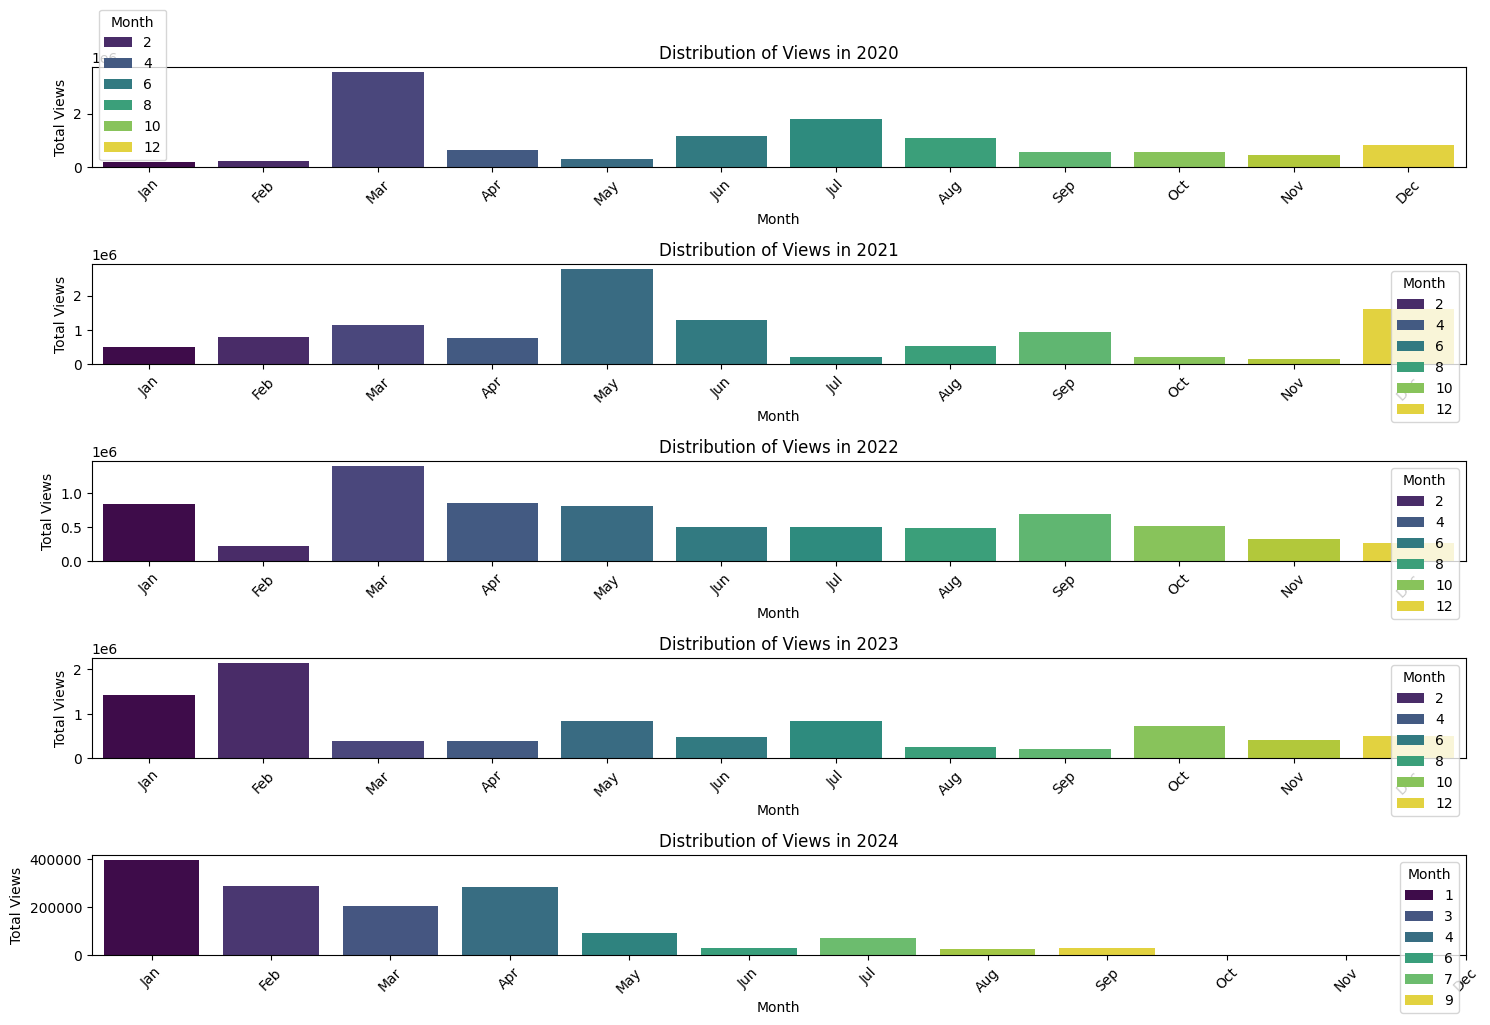

In [ ]:
#  in the following plot we will be loooking at the report of distribution of views per months over the years
# Extract Year and Month
df['Year'] = df['Published_date'].dt.year
df['Month'] = df['Published_date'].dt.month

# Group by Year and Month, summing Views
monthly_views = df.groupby(['Year', 'Month'])['Views'].sum().reset_index()

# Create a grid of plots for each year
years = monthly_views['Year'].unique()
num_years = len(years)

plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    plt.subplot(num_years, 1, i + 1)
    sns.barplot(data=monthly_views[monthly_views['Year'] == year], x='Month', y='Views',hue='Month', palette='viridis')
    plt.title(f'Distribution of Views in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Views')
    plt.xticks(ticks=range(12), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()

we can see most videos are viewed between january and july and as the year progresses  the number of views go on reducing and oround december we have less views.

we will have to look at this and try to understand is this because we have less videos published in december ?

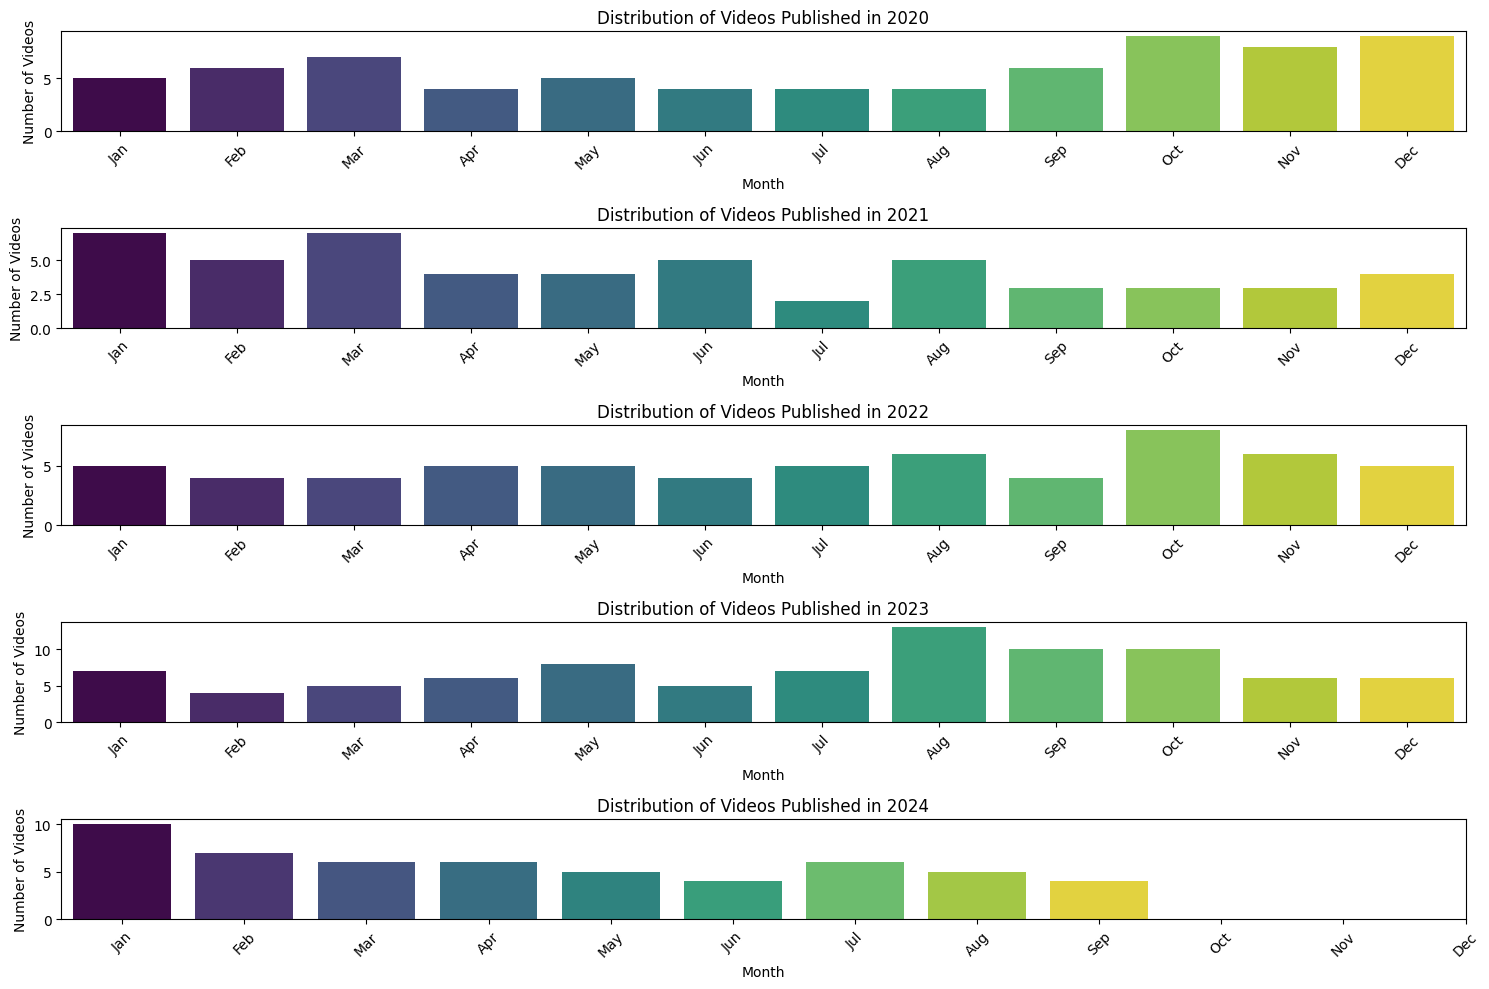

In [ ]:
# Total number of videos per month per year
# Extract Year and Month
df['Year'] = df['Published_date'].dt.year
df['Month'] = df['Published_date'].dt.month

# Group by Year and Month, counting the number of videos
monthly_video_count = df.groupby(['Year', 'Month']).size().reset_index(name='Video Count')

# Create a grid of plots for each year
years = monthly_video_count['Year'].unique()
num_years = len(years)

plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    plt.subplot(num_years, 1, i + 1)
    sns.barplot(data=monthly_video_count[monthly_video_count['Year'] == year],
                x='Month',
                y='Video Count',
                hue='Month',
                palette='viridis',
                legend=False)
    plt.title(f'Distribution of Videos Published in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Videos')
    plt.xticks(ticks=range(12), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()

We can see that there are comparatively more videos published in december and would not understand why there is less viewership in the month ,

could be people tke a break from learning new things and tend to relax

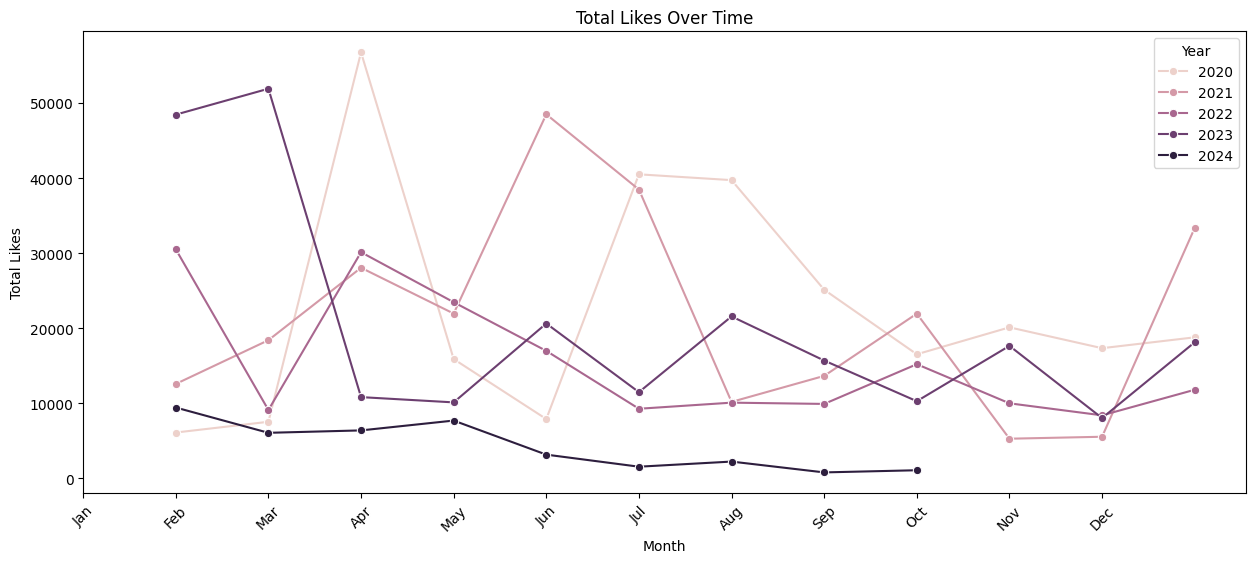

In [ ]:
# summary of likes overtime
# Group by Year and Month, summing Likes
monthly_likes = df.groupby(['Year', 'Month'])['Likes'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_likes, x='Month', y='Likes', hue='Year', marker='o')
plt.title('Total Likes Over Time')
plt.xlabel('Month')
plt.ylabel('Total Likes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


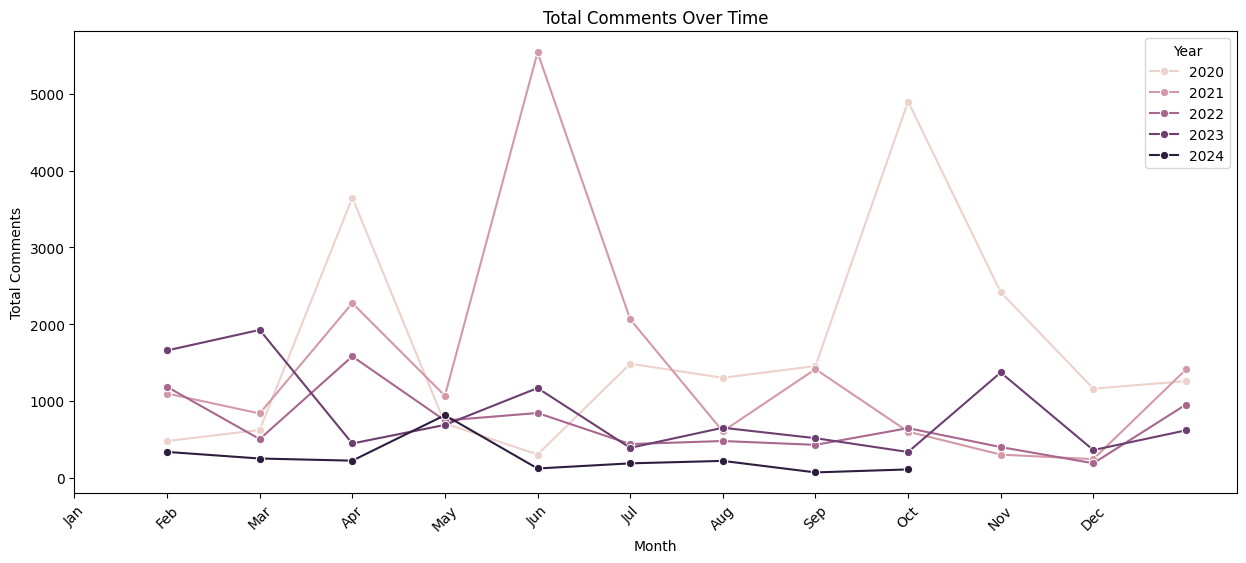

In [ ]:
# Group by Year and Month, summing Comments
monthly_comments = df.groupby(['Year', 'Month'])['Comments'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_comments, x='Month', y='Comments', hue='Year', marker='o')
plt.title('Total Comments Over Time')
plt.xlabel('Month')
plt.ylabel('Total Comments')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


The number of comments has overime reduced so as the number if views of the videos

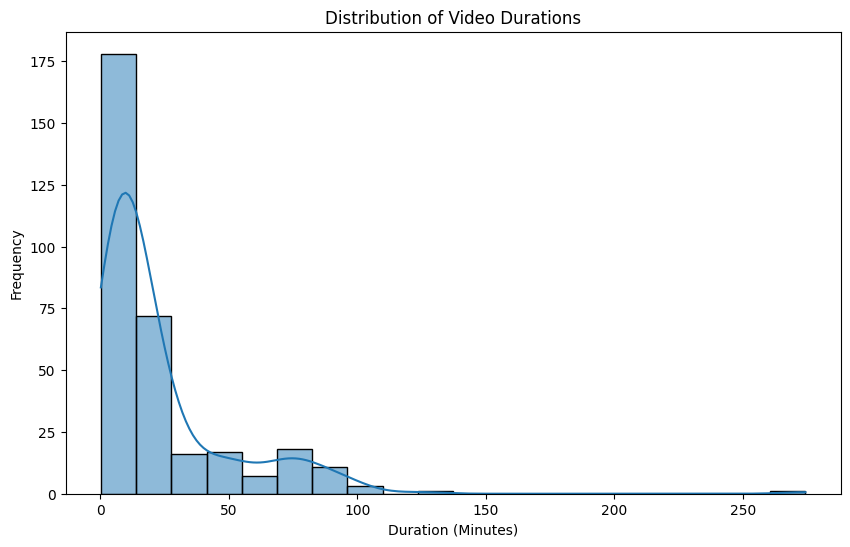

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (Minutes)'], bins=20, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


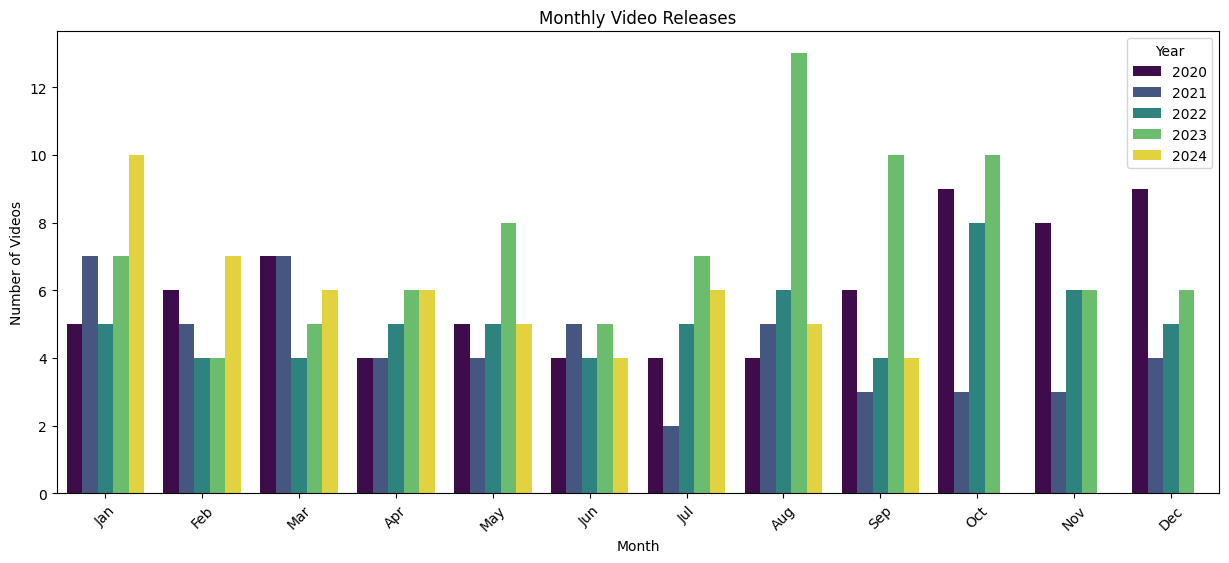

In [ ]:
# In the follwoing we would want to view at the distribution of videos per month
monthly_video_count = df.groupby(['Year', 'Month']).size().reset_index(name='Video Count')

plt.figure(figsize=(15, 6))
sns.barplot(data=monthly_video_count, x='Month', y='Video Count', hue='Year', palette='viridis')
plt.title('Monthly Video Releases')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


From the above we cansee the trend of a u shape  where  at the beginning the videos have a more vidoes published and then towards the middle of the ear the views tend to reduce and then the  videos published rise again

In [37]:
# Top 10 videos by views
top_views = df[['Title', 'Views','Duration (Minutes)']].nlargest(10, 'Views')
print("Top 10 Videos by Views:")
print(top_views)


Top 10 Videos by Views:
                                                 Title    Views  \
229  Data Analyst Portfolio Project | SQL Data Expl...  1966041   
132                       FREE Data Analyst Bootcamp!!  1457584   
312  SQL Basics Tutorial For Beginners | Installing...  1420319   
133  How to Become a Data Analyst in 2023 (Complete...  1163857   
289              What Does a Data Analyst Actually Do?   963049   
287         Top 5 Reasons Not to Become a Data Analyst   923683   
189  Full Project in Excel | Excel Tutorials for Be...   820548   
183  Database vs Data Warehouse vs Data Lake | What...   791748   
295  Data Scientist vs Data Analyst | Which Is Righ...   785929   
292  Data Analyst vs Business Analyst | Which Is Ri...   762961   

     Duration (Minutes)  
229               77.15  
132                6.87  
312                9.62  
133               13.98  
289                4.30  
287                5.30  
189               40.83  
183                5.37  
295 

In [32]:
# Top 10 videos by likes
top_likes = df[['Title',  'Likes']].nlargest(10, 'Likes')
print("\nTop 10 Videos by Likes:")
print(top_likes)



Top 10 Videos by Likes:
                                                 Title  Likes
133  How to Become a Data Analyst in 2023 (Complete...  39659
132                       FREE Data Analyst Bootcamp!!  39221
229  Data Analyst Portfolio Project | SQL Data Expl...  34302
295  Data Scientist vs Data Analyst | Which Is Righ...  24279
200               How To Become A Data Analyst In 2022  22042
183  Database vs Data Warehouse vs Data Lake | What...  20831
223  How To Get a Data Analyst Job (with No Experie...  20364
287         Top 5 Reasons Not to Become a Data Analyst  19775
292  Data Analyst vs Business Analyst | Which Is Ri...  19377
289              What Does a Data Analyst Actually Do?  18795


In [33]:
# Top 10 videos by comments
top_comments = df[['Title',  'Comments']].nlargest(10, 'Comments')
print("\nTop 10 Videos by Comments:")
print(top_comments)



Top 10 Videos by Comments:
                                                 Title  Comments
229  Data Analyst Portfolio Project | SQL Data Expl...      4164
281  How I Changed Careers to Become a Data Analyst...      3825
312  SQL Basics Tutorial For Beginners | Installing...      2050
132                       FREE Data Analyst Bootcamp!!      1528
238  Google Data Analytics Professional Certificate...      1173
133  How to Become a Data Analyst in 2023 (Complete...      1131
287         Top 5 Reasons Not to Become a Data Analyst      1049
189  Full Project in Excel | Excel Tutorials for Be...      1035
273  Data Analyst Certifications | Are They Worth I...       987
226  Data Analyst Portfolio Project | Data Cleaning...       870


In [36]:
# Top 10 videos by duration
top_duration = df[['Title','Views',  'Duration (Minutes)']].nlargest(10, 'Duration (Minutes)')
print("\nTop 10 Videos by Duration:")
print(top_duration)



Top 10 Videos by Duration:
                                                 Title  Views  \
57   Analyst Builder Full Launch LiveStream | 20% O...  11820   
22   2 Hour Data Analyst Interview Masterclass | In...  67042   
105                                  500k Livestream!!   6261   
118  Data Analyst Q/A Livestream | April Livestream...  10296   
7         August Q/A Livestream! Come Ask Me Anything!   5061   
36   Q/A Livestream | February Livestream | Ask Me ...   5544   
75   Data Analyst Q/A Livestream | September Livest...   8957   
158  Data Analyst Live Stream | Riding out Hurrican...   6744   
110  Data Analyst Q/A Livestream | May Livestream |...  10240   
262                     Data Analyst Q/A LIVE #5 | AMA   4864   

     Duration (Minutes)  
57               274.40  
22               124.67  
105              103.87  
118               99.07  
7                 98.40  
36                94.95  
75                93.68  
158               93.13  
110               92.4